## Historical Analysis Versioned Datasets
---

The propose of the analysis is to track the performnce of the valid information among the datasets on a linked data schema, to aim this we need a data quality assesment tool, and with the help of computational metrics to accomplish it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
!ls data/Input/

kegg-drug.ttl         metricts-tracking.csv


In [3]:
df_metrics = pd.read_csv('data/Input/metricts-tracking.csv', sep=';')

In [4]:
df_metrics.head(10)

,id,dataset,test-execution,succeeded,failed,violation-instances,violation-type,version-number
0,1,https://biosharing.org/biodbcore-000037,10,214,"31,63",3157,contains-literal,1
1,2,https://biosharing.org/biodbcore-000081,7,281,"36,23",2992,contains-literal,1
2,3,https://biosharing.org/biodbcore-000095,4,232,"34,57",3310,contains-literal,1
3,4,https://biosharing.org/biodbcore-000104,8,183,"27,81",3027,contains-literal,1
4,5,https://biosharing.org/biodbcore-000137,8,252,"18,85",3513,different-domain,1
5,6,https://biosharing.org/biodbcore-000155,9,263,"2,64",2883,onto-not-match,1
6,7,https://biosharing.org/biodbcore-000156,1,214,"37,21",3105,onto-not-match,1
7,8,https://biosharing.org/biodbcore-000173,2,146,"23,6",2763,different-domain,1
8,9,https://biosharing.org/biodbcore-000304,8,222,"21,26",3087,contains-literal,1
9,10,https://biosharing.org/biodbcore-000329,9,236,"35,65",2835,contains-literal,1


In [5]:
df_metrics.groupby('violation-type').mean()[['violation-instances','version-number']].transpose()

violation-type,contains-literal,different-domain,onto-not-match
violation-instances,2479.125000,2254.606557,2335.093333
version-number,4.953125,6.032787,5.800000


In [6]:
datasets = df_metrics['dataset'].unique()

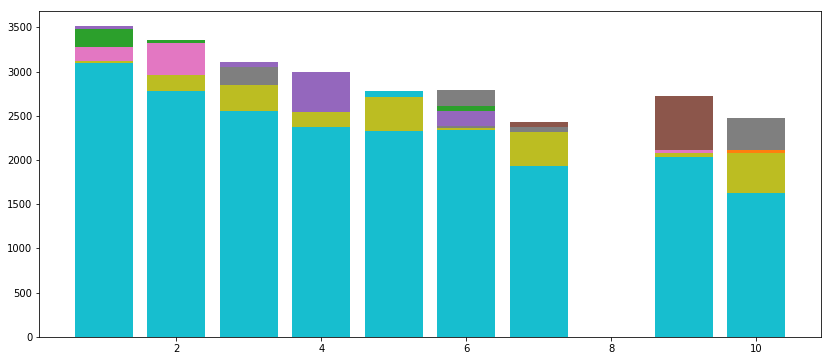

In [7]:
plt.figure(figsize=[14, 6])
for i in datasets:
    df_uniq = df_metrics[df_metrics['dataset'] == str(i)]
    plt.bar(df_uniq['version-number'], df_uniq['violation-instances'])

In [8]:
trace11 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000037']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000037']['violation-instances'],
    mode = 'lines+markers',
    name = 'biodbcore-000037'
)
trace12 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000081']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000081']['violation-instances'],
    mode = 'lines+markers',
    name = 'biodbcore-000081'
)
trace13 = go.Scatter(
    x = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000095']['version-number'],
    y = df_metrics[df_metrics['dataset'] == 'https://biosharing.org/biodbcore-000095']['violation-instances'],
    mode = 'lines+markers',
    name = 'biodbcore-000095'
)
data = [trace11, trace12, trace13]
title = 'Main Source for News'

layout = dict(title = 'Tracking Versioned Datasets',
              xaxis = dict(title = 'Version Number'),
              yaxis = dict(title = 'Number of Violation Instances'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')
#py.iplot(data, filename='line-mode')